In [39]:
import pandas as pd
from sklearn.datasets import load_wine


In [43]:
data = load_wine()
print(data)
X = pd.DataFrame(data=data.data,columns=data.feature_names)
y = pd.DataFrame(data.target)



{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
 

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.3)


In [46]:
from sklearn.feature_selection import mutual_info_classif
mutual_clf = mutual_info_classif(X_train,y_train)

mutual_clf


/home/tejas.raval@simform.dom/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0.43312936, 0.2858441 , 0.12058628, 0.23185487, 0.2265755 ,
       0.3734046 , 0.70042657, 0.08122227, 0.37388587, 0.53738958,
       0.61234874, 0.50932795, 0.54234176])

In [47]:
mutual_clf = pd.Series(mutual_clf)
mutual_clf.index = X_train.columns
mutual_clf.sort_values(ascending=False)


flavanoids                      0.700427
hue                             0.612349
proline                         0.542342
color_intensity                 0.537390
od280/od315_of_diluted_wines    0.509328
alcohol                         0.433129
proanthocyanins                 0.373886
total_phenols                   0.373405
malic_acid                      0.285844
alcalinity_of_ash               0.231855
magnesium                       0.226576
ash                             0.120586
nonflavanoid_phenols            0.081222
dtype: float64

<Axes: >

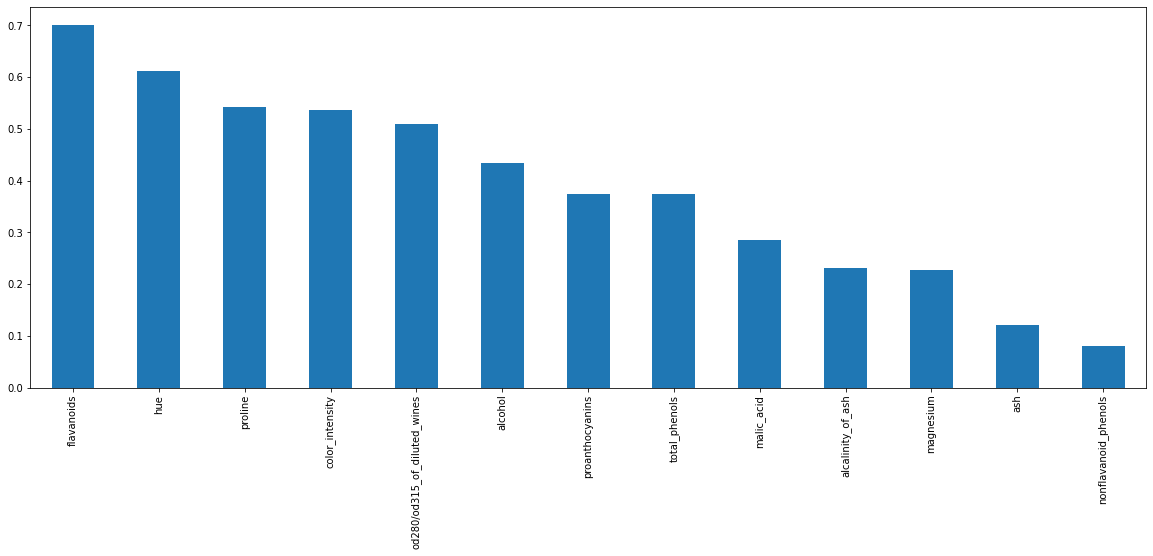

In [51]:
mutual_clf.sort_values(ascending=False).plot.bar(figsize =(20,7))

In [52]:
from sklearn.feature_selection import SelectKBest

In [54]:
sel_five_cols = SelectKBest(mutual_info_classif,k = 5)
sel_five_cols.fit(X_train,y_train)
X_train.columns[sel_five_cols.get_support()]

/home/tejas.raval@simform.dom/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Index(['flavanoids', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines',
       'proline'],
      dtype='object')